# Trabalho Prático

- [Univariate Analysis](#Univariate-Analysis)
- [Bivariate Analysis](#Bivariate-Analysis)
- [Methods Application](#Methods-Application)
- [Feature Selection](#Feature-Selection)
- [Logistic GAM](#Logistic-GAM)
- [Decision Trees and Random Forest](#Decision-Trees-and-Random-Forest)
- [Support Vector Machines](#Support-Vector-Machines)
- [Principal Components Analysis](#Principal-Components-Analysis)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df_gun_shot =  pd.read_csv('gun_shot.csv', sep=",")
df_jackhammer = pd.read_csv('jackhammer.csv', sep=",")
df_street_music = pd.read_csv('street_music.csv', sep=",")

In [3]:
df_gun_shot.shape

(374, 27)

## Univariate Analysis

**Distribution of individual features**

### Gun_shot

In [4]:
# Gun shot coefficient mean columns
media_columns = ['media0', 'media1', 'media2', 'media3', 'media4', 'media5', 'media6', 'media7', 'media8', 'media9', 'media10', 'media11', 'media12']

df_gun_shot[media_columns].describe()

,media0,media1,media2,media3,media4,media5,media6,media7,media8,media9,media10,media11,media12
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,4.400968,-1.909674,0.405831,-0.733868,-0.005712,-0.248574,0.110392,0.069461,0.211047,0.211660,0.148662,0.145365,0.079369
std,3.070024,2.153427,1.086234,1.043207,0.856880,0.876064,0.630605,0.591378,0.609100,0.524292,0.507548,0.398470,0.397488
min,-2.374297,-9.984891,-4.616603,-3.395095,-4.362307,-2.364365,-1.998527,-1.381504,-0.999720,-1.126607,-0.780531,-1.085827,-0.961223
25%,2.313416,-3.269613,-0.183895,-1.501971,-0.519650,-0.981525,-0.291591,-0.387469,-0.302206,-0.128928,-0.319551,-0.138993,-0.224523
50%,4.505238,-2.042496,0.534240,-0.816605,0.017320,-0.276786,0.083848,0.035693,0.265271,0.128307,0.219204,0.092253,0.094685
75%,7.144508,-0.421413,1.037792,0.106046,0.543007,0.348033,0.553546,0.433426,0.681830,0.561265,0.492189,0.363992,0.335960
max,9.801404,2.757198,2.701295,1.858257,3.014615,2.050018,1.917754,1.949060,1.505559,1.788323,1.429170,1.309835,0.965961


In [5]:
# Gun shot coefficient deviation columns
desvio_columns = ['desvio0', 'desvio1', 'desvio2', 'desvio3', 'desvio4', 'desvio5', 'desvio6', 'desvio7', 'desvio8', 'desvio9', 'desvio10', 'desvio11', 'desvio12']

df_gun_shot[desvio_columns].describe()

,desvio0,desvio1,desvio2,desvio3,desvio4,desvio5,desvio6,desvio7,desvio8,desvio9,desvio10,desvio11,desvio12
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,5.574172,3.251377,1.642538,1.528155,1.127337,0.994389,0.792958,0.671265,0.692395,0.569628,0.529344,0.462544,0.377500
std,2.507257,1.357015,0.531621,0.606815,0.490063,0.473649,0.304396,0.223366,0.255321,0.159410,0.165966,0.132995,0.076230
min,1.394272,0.796035,0.722007,0.528566,0.340258,0.382283,0.335565,0.336986,0.331000,0.298010,0.297620,0.251726,0.245712
25%,3.269556,2.494261,1.286569,1.117218,0.736722,0.651125,0.564415,0.504769,0.498197,0.458971,0.399275,0.364078,0.325201
50%,5.133508,3.069376,1.586537,1.453784,1.071449,0.910138,0.719814,0.605992,0.619955,0.530042,0.487089,0.432094,0.349844
75%,7.939113,3.715460,1.927879,1.830822,1.399553,1.167444,0.950883,0.783467,0.807981,0.654703,0.617454,0.528408,0.413316
max,10.480054,9.536979,5.571597,3.595715,3.719680,2.864851,2.242713,1.542371,1.610822,1.506328,1.250150,1.146564,0.736697


In [6]:
# Check data types and missing values
gun_shot_info = pd.DataFrame({
    'Data Type': df_gun_shot.dtypes,
    'Missing Values': df_gun_shot.isnull().sum(),
    'NaN': df_gun_shot.isna().sum(),
    'Unique Values': df_gun_shot.nunique()
})

gun_shot_info

,Data Type,Missing Values,NaN,Unique Values
media0,float64,0,0,374
media1,float64,0,0,374
media2,float64,0,0,374
media3,float64,0,0,374
media4,float64,0,0,374
media5,float64,0,0,374
media6,float64,0,0,374
media7,float64,0,0,374
media8,float64,0,0,374
media9,float64,0,0,374


### Jackhammer

In [7]:
df_jackhammer.shape

(1000, 27)

In [8]:
# Check data types and missing values
jackhammer_info = pd.DataFrame({
    'Data Type': df_jackhammer.dtypes,
    'Missing Values': df_jackhammer.isnull().sum(),
    'Unique Values': df_jackhammer.nunique()
})

jackhammer_info

,Data Type,Missing Values,Unique Values
media0,float64,0,1000
media1,float64,0,1000
media2,float64,0,1000
media3,float64,0,1000
media4,float64,0,1000
media5,float64,0,1000
media6,float64,0,1000
media7,float64,0,999
media8,float64,0,1000
media9,float64,0,999


### Street Music

In [9]:
df_street_music.shape

(1027, 27)

In [10]:
# Check data types and missing values
street_music_info = pd.DataFrame({
    'Data Type': df_street_music.dtypes,
    'Missing Values': df_street_music.isnull().sum(),
    'Unique Values': df_street_music.nunique()
})

street_music_info

,Data Type,Missing Values,Unique Values
media0,float64,0,1027
media1,float64,0,1027
media2,float64,0,1027
media3,float64,0,1027
media4,float64,0,1027
media5,float64,0,1026
media6,float64,0,1027
media7,float64,0,1027
media8,float64,0,1027
media9,float64,0,1027


## Bivariate Analysis

### Correlation Between Features

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

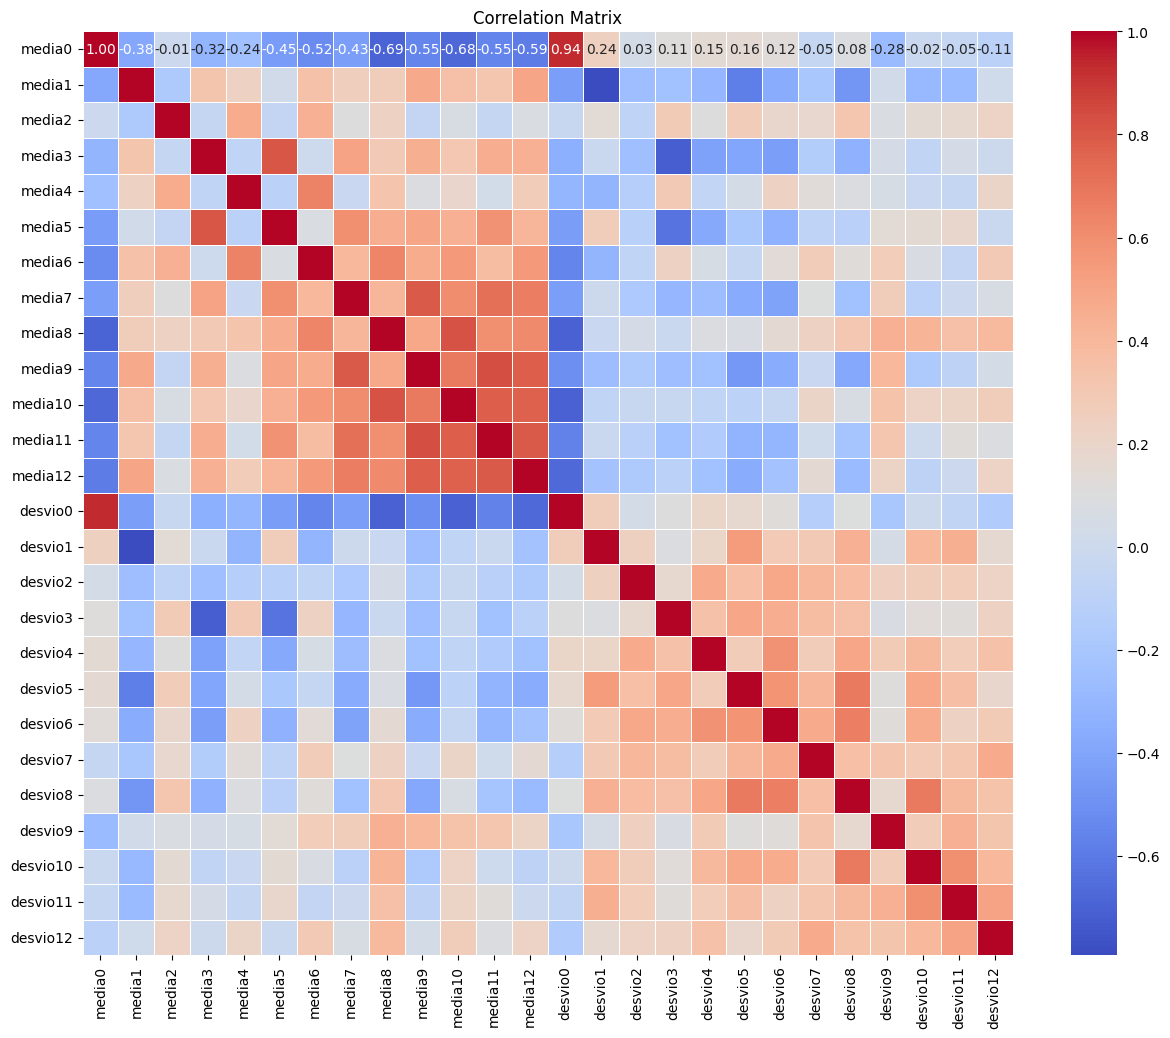

In [12]:
correlation_matrix_gun_shot = df_gun_shot.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_gun_shot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Strongest Positive Correlations**

The following snippet of code highlights the unique pairs of columns whose correlations are higher than 0.7 and lower than 1, in order to filter the strongest positive correlations.

In [13]:
# Get the positive values of correlations and sort them in descending order
strongest_correlations = correlation_matrix_gun_shot[correlation_matrix_gun_shot > 0].unstack().sort_values()

# Filter out correlations with a value of 1 (correlation of a variable with itself)
strongest_correlations = strongest_correlations[(strongest_correlations > 0.7) & (strongest_correlations != 1)]

# Create a set to store unique pairs
unique_pairs = set()

# Iterate through the correlation pairs and add unique pairs to the set
filtered_correlations = []
for pair in strongest_correlations.index:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs.add(pair)
        filtered_correlations.append(pair)

top_n_correlations = filtered_correlations[:10]
print("Strongest Positive Correlations: ")
print(top_n_correlations)

Strongest Positive Correlations: 
[('media7', 'media11'), ('media10', 'media12'), ('media12', 'media9'), ('media10', 'media11'), ('media9', 'media7'), ('media12', 'media11'), ('media5', 'media3'), ('media8', 'media10'), ('media9', 'media11'), ('desvio0', 'media0')]


**Strongest Negative Correlations**

The following snippet of code highlights the unique pairs of columns whose correlations are lower than -0.7 and higher than -1, in order to filter the strongest negative correlations.

In [14]:
# Get the negative values of correlations and sort them in descending order
strongest_correlations = correlation_matrix_gun_shot[correlation_matrix_gun_shot < 0].unstack().sort_values()

# Filter out correlations with a value of 1 (correlation of a variable with itself)
strongest_correlations = strongest_correlations[(strongest_correlations < -0.7) & (strongest_correlations != -1)]

# Create a set to store unique pairs
unique_pairs = set()

# Iterate through the correlation pairs and add unique pairs to the set
filtered_correlations = []
for pair in strongest_correlations.index:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs.add(pair)
        filtered_correlations.append(pair)

top_n_correlations = filtered_correlations[:10]
print("Strongest Negative Correlations: ")
print(top_n_correlations)

Strongest Negative Correlations: 
[('media1', 'desvio1'), ('media3', 'desvio3'), ('desvio0', 'media10'), ('desvio0', 'media8')]


### Correlation Between the Different Target Variables

In [15]:
# Combining the dfs in order to analyse the correlation between the different target analysis
df = pd.concat([df_gun_shot, df_jackhammer, df_street_music], axis=0)

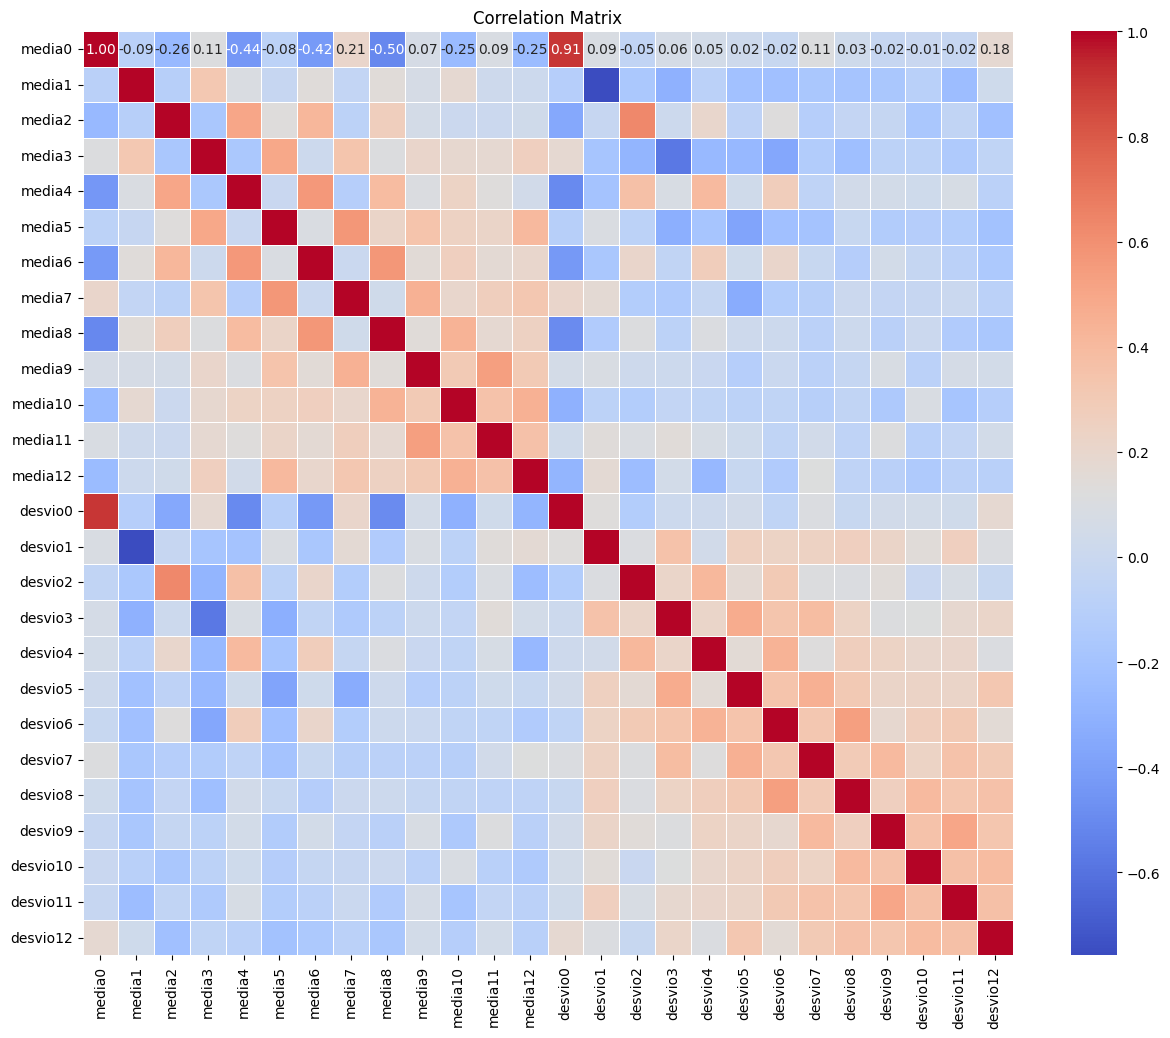

In [16]:
# Calculate correlation matrix for the combined dataframe
correlation_matrix_combined = df.corr()

# Plot correlation heatmap for target variables
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Strongest Positive Correlations**

In [17]:
# Get the positive values of correlations and sort them in descending order
strongest_correlations = correlation_matrix_combined[correlation_matrix_combined > 0].unstack().sort_values()

# Filter out correlations with a value of 1 (correlation of a variable with itself)
strongest_correlations = strongest_correlations[(strongest_correlations > 0.7) & (strongest_correlations != 1)]

# Create a set to store unique pairs
unique_pairs = set()

# Iterate through the correlation pairs and add unique pairs to the set
filtered_correlations = []
for pair in strongest_correlations.index:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs.add(pair)
        filtered_correlations.append(pair)

top_n_correlations = filtered_correlations[:10]
print("Strongest Positive Correlations: ")
print(top_n_correlations)

Strongest Positive Correlations: 
[('media0', 'desvio0')]


**Strongest Negative Correlations**

In [18]:
# Get the negative values of correlations and sort them in descending order
strongest_correlations = correlation_matrix_combined[correlation_matrix_combined < 0].unstack().sort_values()

# Filter out correlations with a value of 1 (correlation of a variable with itself)
strongest_correlations = strongest_correlations[(strongest_correlations < -0.7) & (strongest_correlations != -1)]

# Create a set to store unique pairs
unique_pairs = set()

# Iterate through the correlation pairs and add unique pairs to the set
filtered_correlations = []
for pair in strongest_correlations.index:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs.add(pair)
        filtered_correlations.append(pair)

top_n_correlations = filtered_correlations[:10]
print("Strongest Negative Correlations: ")
print(top_n_correlations)

Strongest Negative Correlations: 
[('media1', 'desvio1')]


# Methods Application

As logistic regression will be used, which is a binary classification algorithm, we will require at least two unique classes for the target variable. If the dataset had only one class, it wouldn't be possible to perform binary classification using logistic regression on that particular dataset, so the approach chosen was to merge the 3 datasets assigned to the team into one, in order to have two classification classes: gun_shot and non_gun_shot.

In [19]:
df.shape

(2401, 27)

In [20]:
classe_info = df['classe'].unique()
classe_info

array(['gun_shot', 'jackhammer', 'street_music'], dtype=object)

**Models**

In [21]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Resampling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.utils import resample
# Evaluation
from sklearn.metrics import accuracy_score

In [22]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=3000),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

## Holdout

Using the Holdout method involves splitting your dataset into two parts: one for training the models and another for testing the models' performance.

In [23]:
X = df.drop(columns=['classe'])  # Features
y = df['classe']  # Target variable

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models using the holdout method
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    print(f'Accuracy (Holdout) for {model_name}: {accuracy}')

Accuracy (Holdout) for Logistic Regression: 0.918918918918919
Accuracy (Holdout) for LDA: 0.8877338877338877
Accuracy (Holdout) for QDA: 0.9147609147609148


### Cross Validation (with k = 5 and k = 10)

### k = 5

In [25]:
# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'Average Accuracy (5-fold CV) for {model_name}: {scores.mean()}')

Average Accuracy (5-fold CV) for Logistic Regression: 0.7413522176022176
Average Accuracy (5-fold CV) for LDA: 0.7250805613305614
Average Accuracy (5-fold CV) for QDA: 0.688011088011088


### k = 10

In [26]:
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f'Average Accuracy (10-fold CV) for {model_name}: {scores.mean()}')

Average Accuracy (10-fold CV) for Logistic Regression: 0.7779477869986169
Average Accuracy (10-fold CV) for LDA: 0.7725432226832643
Average Accuracy (10-fold CV) for QDA: 0.740862724757953


### Leave One Out Cross Validation (LOOCV)

**Leave One Out Cross Validation (LOOCV)** is a special case of k-fold cross-validation where 
k is equal to the number of samples in the dataset. For each iteration, a single sample is used as the test set, and the remaining samples are used for training. LOOCV provides a robust estimate of the model's performance because it uses almost all the data for training and testing.

In [27]:
# Perform LOOCV for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring='accuracy')
    print(f'Average Accuracy (LOOCV) for {model_name}: {scores.mean()}')

Average Accuracy (LOOCV) for Logistic Regression: 0.8917117867555185
Average Accuracy (LOOCV) for LDA: 0.8575593502707205
Average Accuracy (LOOCV) for QDA: 0.9025406080799667


### Bootstrap

**Bootstrap** resampling is a technique where multiple samples are drawn with replacement from the original dataset. This method can be used to estimate the distribution of a statistic by generating multiple resamples and computing the statistic of interest for each resample.

In [28]:
# Number of bootstrap samples
num_samples = 1000

# Perform bootstrap resampling and evaluate models
for model_name, model in models.items():
    accuracy_scores = []
    for _ in range(num_samples):
        # Generate a bootstrap sample
        X_boot, y_boot = resample(X, y, random_state=42)
        
        # Train the model on the bootstrap sample
        model.fit(X_boot, y_boot)
        
        # Make predictions on the original data
        predictions = model.predict(X)
        
        # Compute accuracy and store the result
        accuracy = accuracy_score(y, predictions)
        accuracy_scores.append(accuracy)
    
    # Calculate the average accuracy across bootstraaccuracy_scoresp samples
    average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    print(f'Average Accuracy (Bootstrap) for {model_name}: {average_accuracy}')

Average Accuracy (Bootstrap) for Logistic Regression: 0.8950437317784089
Average Accuracy (Bootstrap) for LDA: 0.8546438983756828
Average Accuracy (Bootstrap) for QDA: 0.9079550187421985


###
About the **Holdout** method: The accuracy of the results can vary based on the random split of the data.

About the **k-fold Cross-Validation** method: The more folds we use, the highest the accuracy of all the models tested is. The gap between the accuracy also tends to be smaller, which can indicate a more stable estimate.

About the **Leave One Out Cross Validation (LOOCV)** method: The accuracy varies a lot, because it relies on a simple sample for testing, leading to possible overfitting.

About the **Bootstrap** method: Together with Holdout and LOOCV, it has the highest accuracy for all models. Out of these, it has the smallest variability, which means it may provide a more reliable estimate of the model's performance.

Generally, for simpler resampling methods like Holdout, the model that has the highest accuracy is Logistic Regression.
As the complexity of the resampling increases, Quadratic Discriminant Analysis has the highest accuracy.
***
### 

# Feature Selection

**Can classification models obtain better results if they use just a few features instead of all available features?**

There are two major problems related to training models: overfitting and underfitting.
**Regularization** is implemented to avoid overfitting of the data, especially when there is a large variance between train and 
test set performance. With regularization, the number of features used in training is kept constant, yet the magnitude of the coefficients is
reduced

There are different ways of reducing model complexity and preventing overfitting in linear models. This includes **ridge and 
lasso regression model**s..s

In [29]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

### L1 Regularization (Lasso)

In [30]:
X = df.drop(columns=['classe'])  # Features
y = df['classe']  # Target variable

In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['classe'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# SelectFromModel with L1 regularization for feature selection
lr_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=3000)
selector = SelectFromModel(estimator=lr_model)

selector.fit(X_train, y_train)

# Transform the training and testing data to include only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
lr_model.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions_lrl1 = lr_model.predict(X_test_selected)

# Calculate accuracy
accuracy_lrl1 = accuracy_score(y_test, predictions_lrl1)
print(f'Accuracy (Holdout) for Logistic Regression with L1 Regularization: {accuracy_lrl1}')

Accuracy (Holdout) for Logistic Regression with L1 Regularization: 0.9147609147609148


### L2 Regularization (Ridge)

In [34]:
# Instantiate Logistic Regression model with L2 regularization (Ridge)
lr_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=3000)
selector = SelectFromModel(estimator=lr_model)

# Fit the feature selector to the training data
selector.fit(X_train, y_train)

# Transform the training and testing data to include only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the Logistic Regression model on the selected features
lr_model.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions_lrl2 = lr_model.predict(X_test_selected)

# Calculate accuracy
accuracy_lrl2 = accuracy_score(y_test, predictions_lrl2)
print(f'Accuracy (Holdout) for Logistic Regression with L2 Regularization: {accuracy_lrl2}')

Accuracy (Holdout) for Logistic Regression with L2 Regularization: 0.8378378378378378


### Elastic Net Regularization

In [36]:
# Instantiate Logistic Regression model with Elastic Net regularization
lr_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=3000)
selector = SelectFromModel(estimator=lr_model)

# Fit the feature selector to the training data
selector.fit(X_train, y_train)

# Transform the training and testing data to include only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the Logistic Regression model on the selected features
lr_model.fit(X_train_selected, y_train)

# Make predictions on the test set
predictions_lren = lr_model.predict(X_test_selected)

# Calculate accuracy
accuracy_lren = accuracy_score(y_test, predictions_lren)
print(f'Accuracy (Holdout) for Logistic Regression with Elastic Net Regularization: {accuracy_lren}')

Accuracy (Holdout) for Logistic Regression with Elastic Net Regularization: 0.8856548856548857


The baseline Logistic Regression model achieved an accuracy of approximately 91.89%. This model does not include any regularization penalty. It's performing slightly better than the L1 regularization model, suggesting that in this particular case, all features are contributing positively to the model's performance, and aggressive feature selection (as in L1 regularization) might not be beneficial.

The model with **L1 regularization** achieved an accuracy of approximately 91.48%. L1 regularization encourages sparsity in the model by forcing some feature coefficients to be exactly zero. This means the L1 regularization effectively performs feature selection by setting some feature weights to zero, allowing the model to focus on the most relevant features.

The model with **L2 regularization** achieved an accuracy of approximately 83.78%. L2 regularization penalizes large coefficients, effectively discouraging overly complex models. However, it does not set coefficients exactly to zero, so it doesn't perform feature selection as aggressively as L1 regularization.

The model with **Elastic Net regularization** achieved an accuracy of approximately 88.57%. Elastic Net is a combination of L1 and L2 regularization. It provides a balance between L1 and L2 penalties, allowing for both feature selection and coefficient shrinkage. The accuracy falls between the accuracies of L1 and L2 regularization models.

In summary, the choice of regularization technique depends on the specific problem and dataset. L1 regularization is useful when we suspect that only a few features are important. L2 regularization is helpful when we want to prevent large coefficients and reduce model complexity. Elastic Net strikes a balance between these two techniques. The baseline Logistic Regression without regularization performs well in this case, indicating that all features are contributing positively to the model's accuracy.

# Learning a non-linear function

### Logistic GAM

In [37]:
from pygam import LogisticGAM, s, f
from pygam.datasets import default

In [38]:
X = df.drop(columns=['classe']).values
y = df['classe']

In [39]:
# One-hot encoding of column "classe"
y = pd.get_dummies(y, columns=["classe"])

In [40]:
y = y.drop(['jackhammer', 'street_music'], axis=1)

In [41]:
y.columns

Index(['gun_shot'], dtype='object')

Logistic GAM:
- l() for linear terms
- s() (splines) for numerical variables
- f() for categorical features.
- te() for tensor products
- intercept

In [42]:
# l() for linear terms
# s() (splines) for numerical variables
# f() for categorical features.
# te() for tensor products
# intercept
gam = LogisticGAM(n_splines=5).gridsearch(X, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


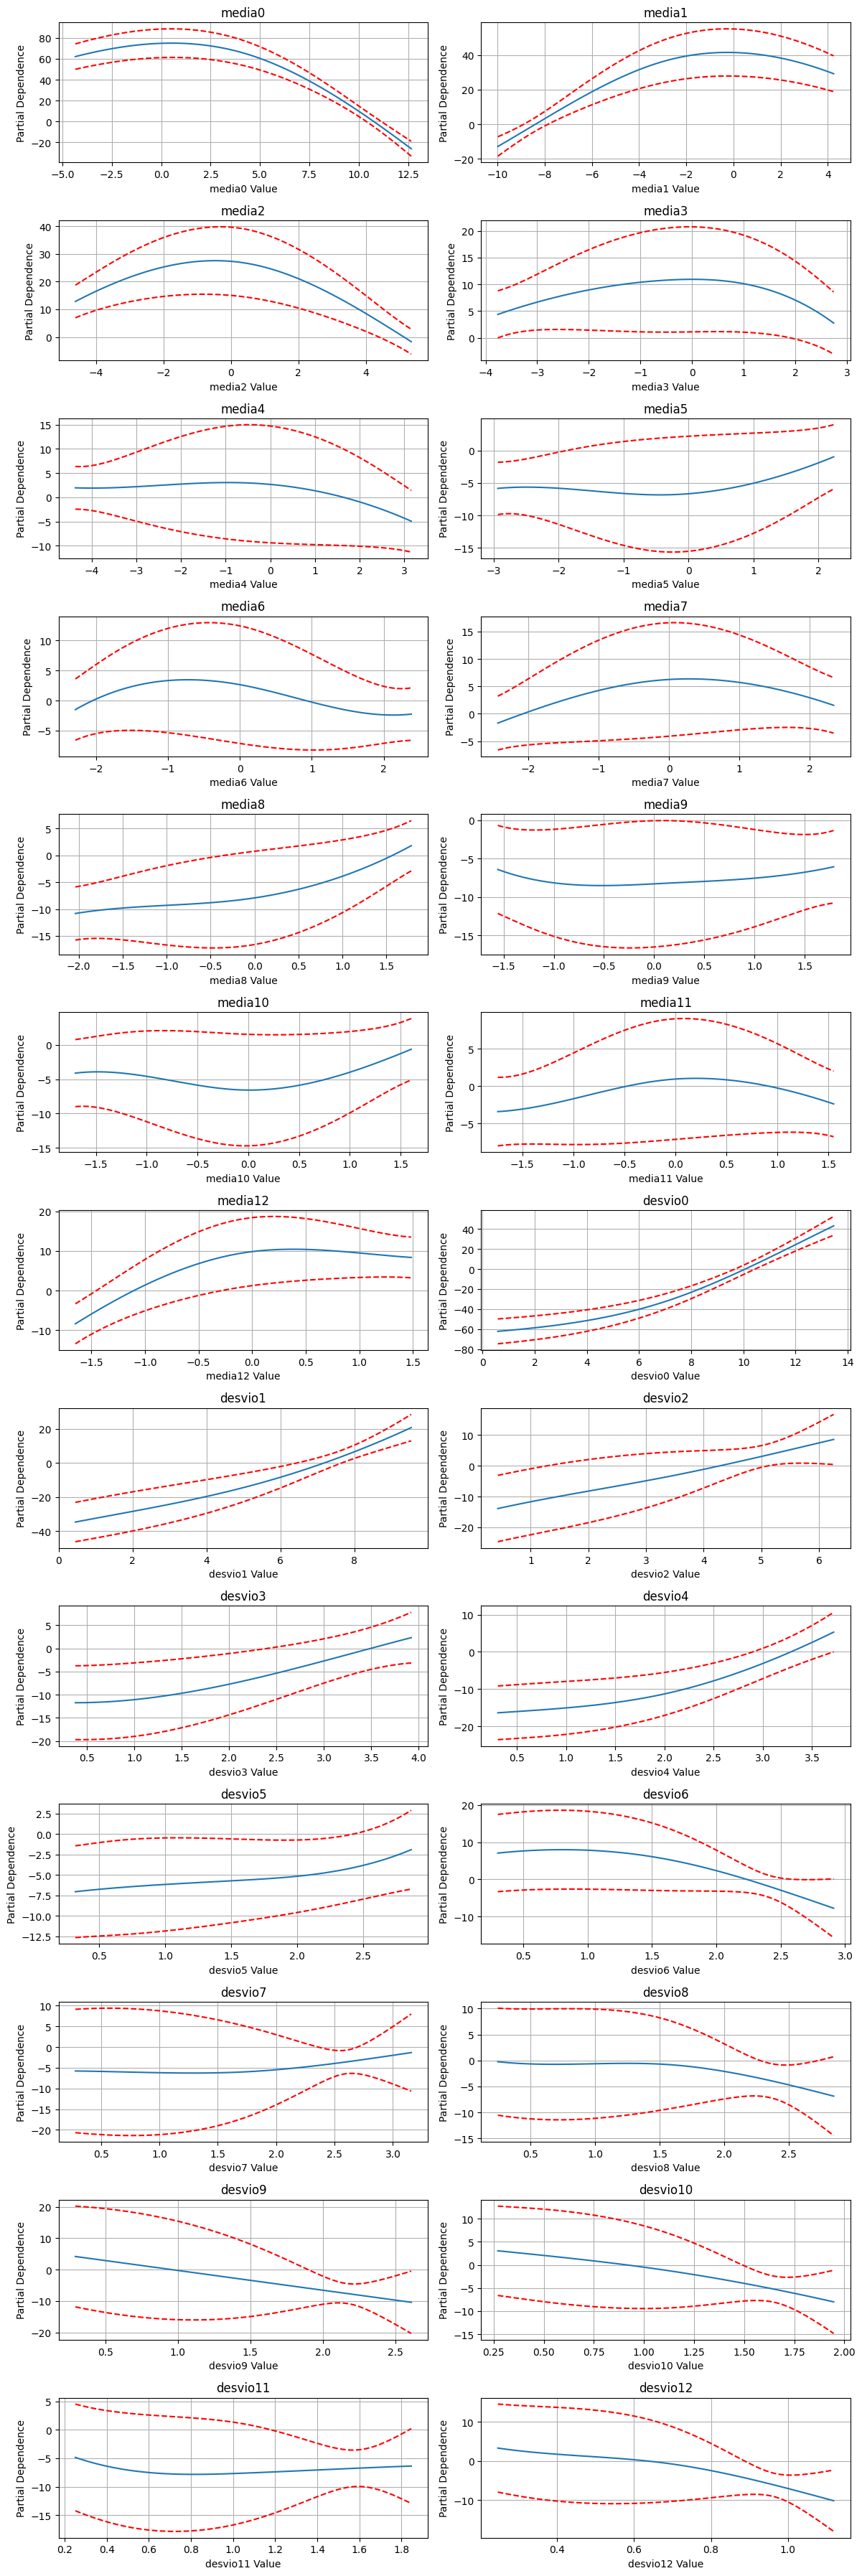

In [43]:
# Grid of subplots for each feature
fig, axs = plt.subplots(13, 2, figsize=(12, 36))
titles = df.columns

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Partial dependencies plot
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    ax.set_xlabel(titles[i] + " Value")
    ax.set_ylabel('Partial Dependence')
    ax.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [44]:
gam.accuracy(X, y)

0.9891711786755518

In [45]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     60.6468
Link Function:                        LogitLink Log Likelihood:                                   -77.5928
Number of Samples:                         2401 AIC:                                              276.4793
                                                AICc:                                             279.7824
                                                UBRE:                                               2.1354
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9253
Feature Function                  Lam

**Note:** 
The pseudo R-squared value is 0.9253. In logistic regression, pseudo R-squared measures the proportion of the total variance in the response variable that is explained by the model. Higher values indicate better fit, with 1.0 indicating a perfect fit.

In [46]:
gam2 = LogisticGAM(n_splines=4).gridsearch(X, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


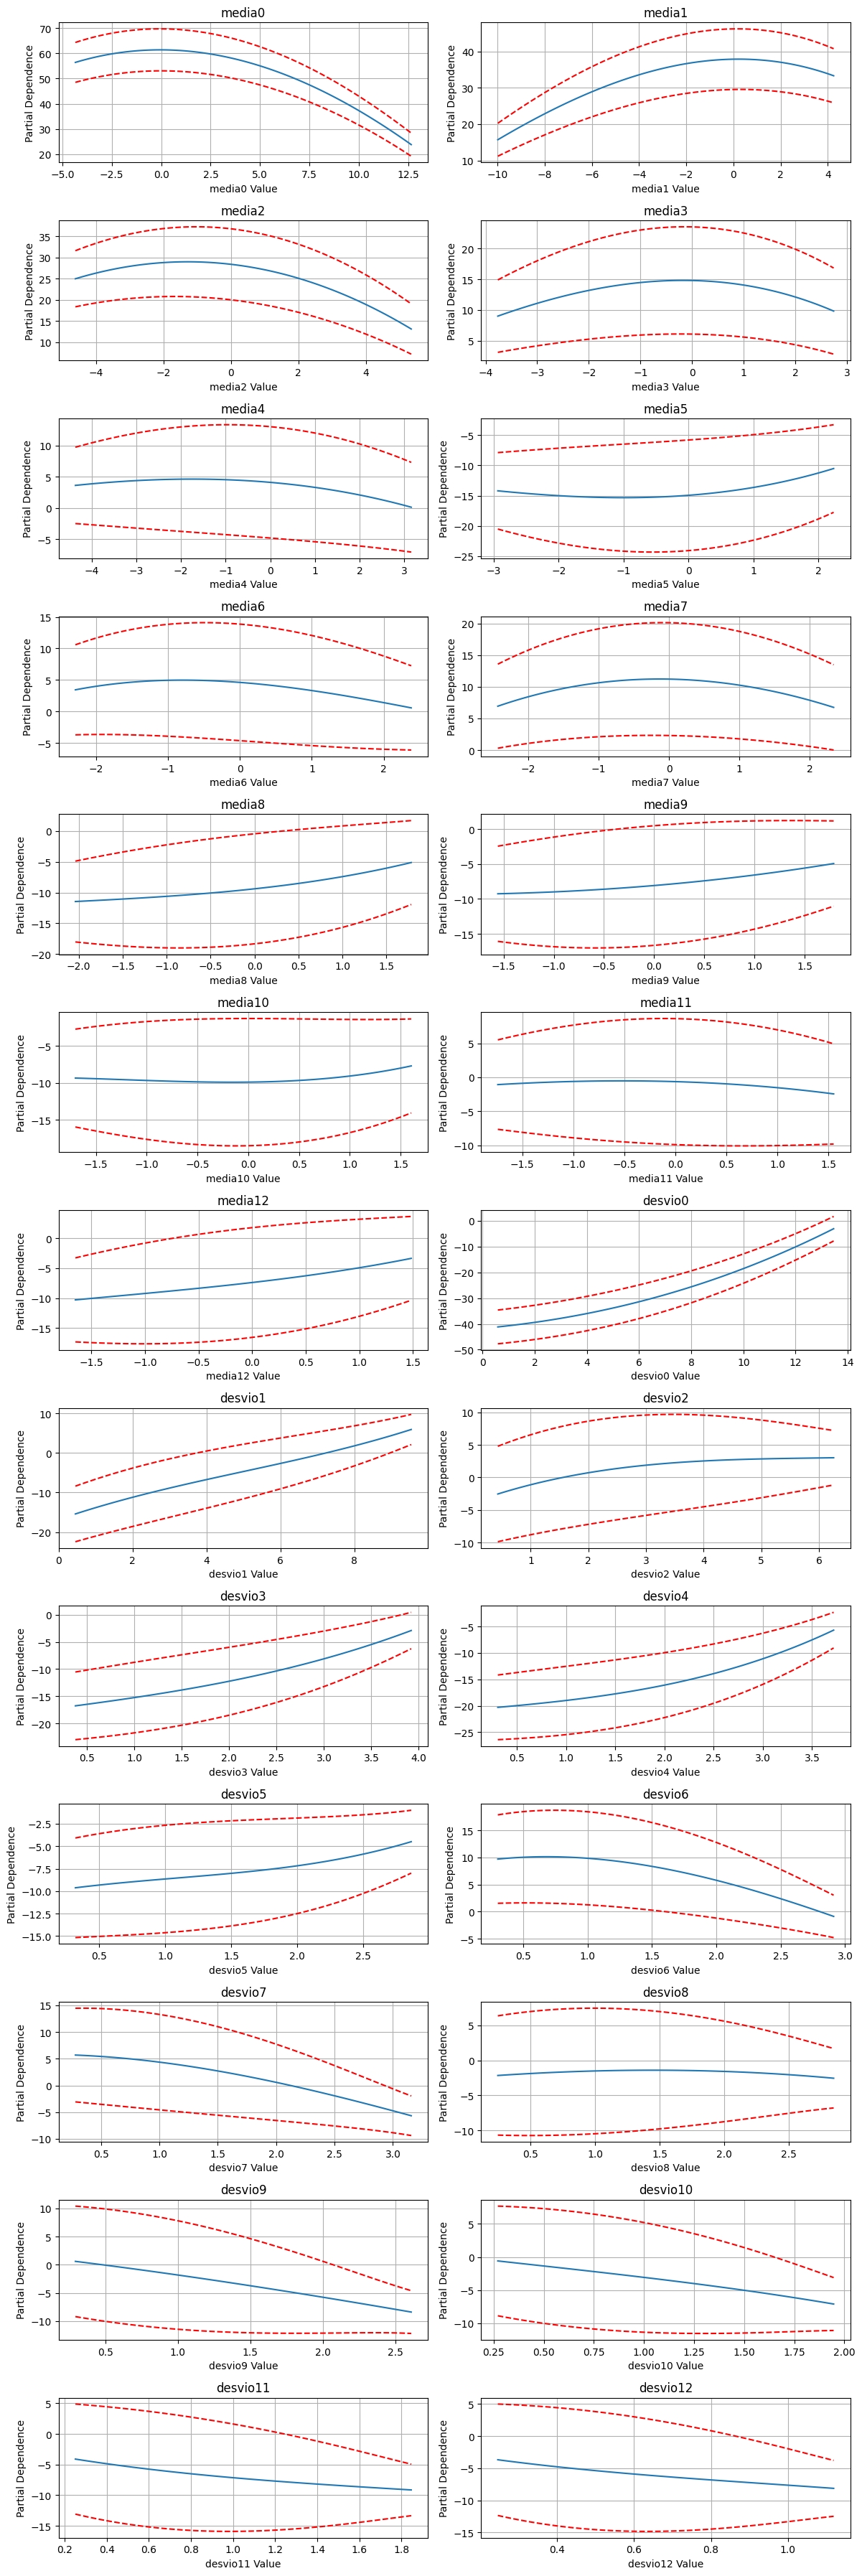

In [47]:
# Grid of subplots for each feature
fig, axs = plt.subplots(13, 2, figsize=(12, 36))
titles = df.columns

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Partial dependencies plot
for i, ax in enumerate(axs):
    XX = gam2.generate_X_grid(term=i)
    pdep, confi = gam2.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    ax.set_xlabel(titles[i] + " Value")
    ax.set_ylabel('Partial Dependence')
    ax.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [48]:
gam2.accuracy(X, y)

0.9808413161182841

In [49]:
gam2.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     45.7166
Link Function:                        LogitLink Log Likelihood:                                  -162.8418
Number of Samples:                         2401 AIC:                                              417.1167
                                                AICc:                                             419.0112
                                                UBRE:                                                2.189
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8432
Feature Function                  Lam

In [50]:
cv_scores = cross_val_score(gam, X, y, cv=10, scoring='accuracy')
cv_scores2 = cross_val_score(gam2, X, y, cv=10, scoring='accuracy')

print("Mean Accuracy (n-splits=5):", cv_scores.mean())
print("Mean Accuracy (n-splits=4):", cv_scores2.mean())

Mean Accuracy (n-splits=5): 0.8445833333333332
Mean Accuracy (n-splits=4): 0.8445833333333332


In [51]:
loo_cv_score = cross_val_score(gam, X, y, cv=LeaveOneOut(), scoring='accuracy')
loo_cv_score2 = cross_val_score(gam, X, y, cv=LeaveOneOut(), scoring='accuracy')

print("Mean Accuracy (n-splits=5):", loo_cv_score.mean())
print("Mean Accuracy (n-splits=4):", loo_cv_score2.mean())

Mean Accuracy (n-splits=5): 0.844231570179092
Mean Accuracy (n-splits=4): 0.844231570179092


The accuracy for both models is the same. Based on the R-squared factor, the best Logistic GAM is the one that has 5 splines.

# Decision Trees and Random Forest

## Decision Trees

Decision trees can be applied to Regression and Classification problems. In this assignment, we will ally it to Classification.
Even though they are simple to interpret, Decision Trees are not among the best models in terms of accuracy. s.

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

0.7027027027027027

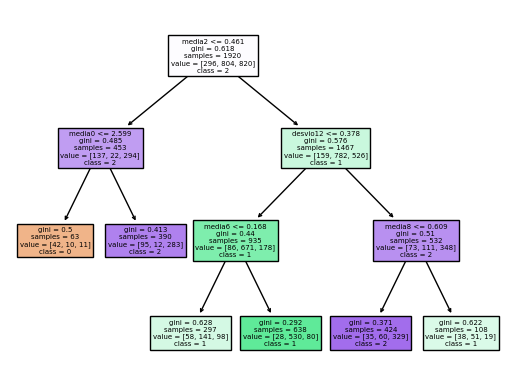

In [53]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)

# Train the model
clf.fit(X_train, y_train)

# Plot
features = list(clf.feature_names_in_)
classes = list(clf.classes_)
plot_tree(clf, feature_names=features, class_names=[str(element) for element in classes], filled=True)

clf.score(X_test, y_test)

In [54]:
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print()
print("------------------------------------------------------")
print()
print(f'Confusion Matrix:\n{conf_matrix}')
print()
print("------------------------------------------------------")
print()
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7027027027027027

------------------------------------------------------

Confusion Matrix:
[[ 12  35  31]
 [  4 174  18]
 [  5  50 152]]

------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.15      0.24        78
           1       0.67      0.89      0.76       196
           2       0.76      0.73      0.75       207

    accuracy                           0.70       481
   macro avg       0.67      0.59      0.58       481
weighted avg       0.69      0.70      0.67       481



## Hyperparameter Tuning in Decision Trees

To tune the hyperparameters of a Decision Tree and prevent overfitting, we can perform a hyperparameter search using a technique called grid search. 
Grid search exhaustively searches over specified parameter values for an estimator.
The goal is to find the combination of hyperparameters that provides the best performance on a validation set. 

### 1. criterion

Determines the impurity measure used to evaluate the quality of a split when constructing the tree. It influences the decision on how nodes should be divided. Setting "criterion" to "gini" employs Gini impurity as the measure, while "entropy" uses information gain.
In practice, they often lead to similar results, and the decision between them may come down to computational efficiency. Gini impurity is faster to compute since it doesn't involve logarithmic functions, while entropy might be slightly slower due to the logarithmic computations.

In [55]:
dtc = DecisionTreeClassifier(random_state=42, criterion='gini')
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


| criterion    | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|         gini |                 1.0 |            0.90228 |
|      entropy |                 1.0 |            0.88773 |

### 2. splitter

The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
The choice between "best" and "random" depends on the specific characteristics of the dataset and the goal of the modeling. If the dataset has a large number of features, using "random" can lead to more diverse trees and may prevent overfitting. However, if the dataset is not too large, "best" may be a more exhaustive and accurate strategy.

In [56]:
dtc = DecisionTreeClassifier(random_state=42, splitter='best')
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


| splitter     | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|         best |                 1.0 |            0.90228 |
|       random |                 1.0 |            0.89397 |

### 3. max_depth

Controls the maximum depth or levels of the tree. Setting a maximum depth helps prevent the tree from becoming too complex and overfitting the training data. A deeper tree can potentially capture intricate details of the training data, including noise, but may not generalize well to new, unseen data.

In [57]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=None)
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


|    max_depth | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|         None |                 1.0 |            0.90228 |
|            5 |             0.86145 |            0.82952 |
|           10 |             0.98437 |            0.89812 |
|           15 |                 1.0 |            0.90228 |

### 4. min_samples_split

Specifies the minimum number of samples required to split an internal node. If the number of samples at a node falls below this threshold, the node won't be split, and it will become a leaf node. This hyperparameter helps control the complexity of the decision tree and mitigate overfitting.
A higher value for "min_samples_split" results in a tree with fewer nodes, promoting simplicity and potentially improving generalization to new, unseen data. On the other hand, setting it too high may lead to underfitting, as the tree might not capture the underlying patterns in the data effectively.

In [58]:
dtc = DecisionTreeClassifier(random_state=42, min_samples_split=2)
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


|    min_samples_split | Train Data Accuracy | Test Data Accuracy |
|           ----------:| -------------------:| ------------------:|
|                    2 |                 1.0 |            0.90228 |
|                    5 |             0.98958 |            0.89397 |
|                   10 |             0.97864 |            0.89397 |

### 5. min_samples_leaf

Determines the minimum number of samples required to be present in a leaf node. Increasing the value of "min_samples_leaf" tends to result in a more conservative tree, as it prevents the algorithm from creating nodes with very few samples. This helps prevent overfitting by ensuring that each leaf has a sufficient number of samples to make reliable predictions. Larger values of "min_samples_leaf" lead to a simpler tree with fewer leaves. This can be advantageous in preventing the model from capturing noise in the training data and, consequently, improving its generalization to new, unseen data. A smaller value might lead to a more complex tree that fits the training data well but is prone to overfitting. On the other hand, a larger value encourages a simpler model but may sacrifice some precision on the training set.

In [59]:
dtc = DecisionTreeClassifier(random_state=42, min_samples_leaf=4)
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 0.9515625
Score test: 0.8731808731808732


|     min_samples_leaf | Train Data Accuracy | Test Data Accuracy |
|           ----------:| -------------------:| ------------------:|
|                    1 |                 1.0 |            0.90228 |
|                    2 |             0.97552 |            0.89812 |
|                    4 |             0.95156 |            0.87318 |

### 6. min_weight_fraction_leaf

Specifies the minimum weighted fraction of the total sum of weights (of the input samples) required to be present in a leaf node. This hyperparameter is an alternative to "min_samples_leaf" and allows users to define the minimum amount of the overall weight that must be present in a leaf for it to be considered valid.

In [60]:
dtc = DecisionTreeClassifier(random_state=42, min_weight_fraction_leaf=0.0)
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


| min_weight_fraction_leaf | Train Data Accuracy | Test Data Accuracy |
|           ----------:| -------------------:| ------------------:|
|                  0.0 |                 1.0 |            0.90228 |
|                  0.1 |             0.72135 |            0.68607 |
|                  0.2 |             0.65781 |            0.65280 |

### 7. max_features

In [61]:
dtc = DecisionTreeClassifier(random_state=42, max_features=None)
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


|         max_features | Train Data Accuracy | Test Data Accuracy |
|           ----------:| -------------------:| ------------------:|
|                 sqrt |                 1.0 |            0.87318 |
|                 log2 |                 1.0 |            0.87941 |
|                 None |                 1.0 |            0.90228 |

### 8. min_impurity_decrease

Used to control tree growth by specifying a threshold for the minimum impurity decrease required to make a split. Decision trees use impurity measures (such as Gini impurity or entropy) to evaluate the quality of a split.

In [62]:
dtc = DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.0)
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


|min_impurity_decrease | Train Data Accuracy | Test Data Accuracy |
|           ----------:| -------------------:| ------------------:|
|                  0.0 |                 1.0 |            0.90228 |
|                 0.01 |             0.84895 |            0.80873 |
|                 0.05 |                 0.7 |            0.67567 |
|                  0.1 |             0.65468 |            0.63617 |
|                  0.2 |             0.42708 |            0.43035 |

### 9. class_weight

Used to assign different weights to classes in the input data. The default value for "class_weight" is typically set to None, meaning that all classes have equal importance. In imbalanced scenarios, setting "class_weight" to "balanced" automatically adjusts the weights based on the inverse of the class frequencies in the input data. "class_weight" is especially useful in situations where the costs of false positives and false negatives are asymmetric, and there is a need to prioritize the correct classification of specific classes.

In [63]:
dtc = DecisionTreeClassifier(random_state=42, class_weight=None)
dtc.fit(X_train, y_train)

score_train_dtc = dtc.score(X_train, y_train)
print("Score train:", score_train_dtc)

score_test_dtc = dtc.score(X_test, y_test)
print("Score test:", score_test_dtc)

Score train: 1.0
Score test: 0.9022869022869023


|         class_weight | Train Data Accuracy | Test Data Accuracy |
|           ----------:| -------------------:| ------------------:|
|                 None |                 1.0 |            0.90228 |
|             Balanced |                 1.0 |            0.88773 |

### Using GridSearchCV

In [65]:
import numpy as np

In [66]:
# Defining the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': np.logspace(-4, 1, 5), # generates 5 values from 10^-4 to 10^1 on a logarithmic scale
    'random_state': [None, 42],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}

In [67]:
# Perform a grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_features=3, max_leaf_nodes=6),
             param_grid={'ccp_alpha': array([1.00000000e-04, 1.77827941e-03, 3.16227766e-02, 5.62341325e-01,
       1.00000000e+01]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'random_state': [None, 42],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [68]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [69]:
# Create a Decision Tree Classifier
clf_best = DecisionTreeClassifier(ccp_alpha=0.0001,
                                  class_weight=None,
                                  criterion='gini',
                                  max_depth=None,
                                  max_features=None,
                                  min_impurity_decrease=0,
                                  min_samples_leaf=1, 
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0,
                                  random_state=None,
                                  splitter='best' 
                                  )

# Train the model
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, min_impurity_decrease=0,
                       min_weight_fraction_leaf=0)

<Figure size 2000x1000 with 0 Axes>

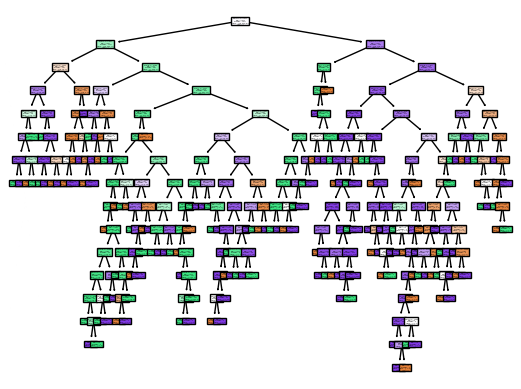

<Figure size 2000x1000 with 0 Axes>

In [70]:
# Plot
features = list(clf_best.feature_names_in_)
classes = list(clf_best.classes_)
plot_tree(clf_best, feature_names=features, class_names=[str(element) for element in classes], filled=True)
plt.figure(figsize=(20, 10))

In [71]:
score_train = clf_best.score(X_train, y_train)
print("Score train:", score_train)

score_test = clf_best.score(X_test, y_test)
print("Score test:", score_test)

Score train: 1.0
Score test: 0.9002079002079002


In [72]:
y_pred = clf_best.predict(X_test)

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy_dtc}')
print()
print("------------------------------------------------------")
print()
print(f'Confusion Matrix:\n{conf_matrix}')
print()
print("------------------------------------------------------")
print()
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9002079002079002

------------------------------------------------------

Confusion Matrix:
[[ 69   3   6]
 [  3 182  11]
 [  9  16 182]]

------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        78
           1       0.91      0.93      0.92       196
           2       0.91      0.88      0.90       207

    accuracy                           0.90       481
   macro avg       0.89      0.90      0.89       481
weighted avg       0.90      0.90      0.90       481



## Random Forest

Random forests are supervised machine learning models that train multiple decision trees and integrate the results by averaging them. Each decision tree makes various kinds of errors, and upon averaging their results, many of these errors are counterbalanced.

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Create a Random Forest Classifier
# n_jobs = -1 is to train multiple decision trees parallelly
rfc = RandomForestClassifier(random_state = 24, n_jobs = -1)

# Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=24)

In [75]:
score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.9688149688149689


In [90]:
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy_rfc1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy_rfc1}')
print()
print("------------------------------------------------------")
print()
print(f'Confusion Matrix:\n{conf_matrix}')
print()
print("------------------------------------------------------")
print()
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.972972972972973

------------------------------------------------------

Confusion Matrix:
[[ 72   2   4]
 [  2 191   3]
 [  0   2 205]]

------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        78
           1       0.98      0.97      0.98       196
           2       0.97      0.99      0.98       207

    accuracy                           0.97       481
   macro avg       0.97      0.96      0.97       481
weighted avg       0.97      0.97      0.97       481



## Hyperparameter Tuning in Random Forests


### 1. n_estimators

This argument limits the number of decision trees in random forests. By default, its value is calibrated to 100, but in the case of larger datasets, 100 can prove to be a meager quantity. Hence, it’s better to try a higher number of estimators. Typically, n_estimators should be kept minimal. In this case, since 100 estimators is has the highest accuracy, we will stick to it.

In [76]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
rfc.fit(X_train, y_train)

score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.972972972972973


| Estimators | Train Data Accuracy | Test Data Accuracy |
| ----------:| -------------------:| ------------------:|
|         20 |             0.99947 |            0.95426 |
|         40 |                 1.0 |            0.96257 |
|         60 |                 1.0 |            0.96673 |
|         80 |                 1.0 |            0.97089 |
|        100 |                 1.0 |            0.97297 |
|        120 |                 1.0 |            0.97089 |
|        130 |                 1.0 |            0.97089 |
|        140 |                 1.0 |            0.97089 |
|        160 |                 1.0 |            0.97089 |
|        180 |                 1.0 |            0.97089 |
|        200 |                 1.0 |            0.97089 |

### 2. max_features

Instead of taking all the features into account for a split, we can select just a few columns, reducing the size of the model to be analised.

In [77]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_features='sqrt')
rfc.fit(X_train, y_train)

score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.972972972972973


| max_features | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|         None |                 1.0 |            0.94802 |
|         sqrt |                 1.0 |            0.97297 |
|         log2 |                 1.0 |            0.96881 |


### 3. min_samples_split

Like explained before, it specifies the minimum number of samples required to split an internal node. The minimum is 2 and it was the value which had the best results.

In [78]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_split=2)
rfc.fit(X_train, y_train)

score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.972972972972973


| min_samples_split | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|           30 |             0.96875 |            0.94802 |
|           20 |             0.98229 |            0.96257 |
|           10 |             0.99322 |            0.96257 |
|            5 |                 1.0 |            0.96673 |
|            3 |                 1.0 |            0.97089 |
|            2 |                 1.0 |            0.97297 |

### 4. min_samples_leaf

Determines the minimum number of samples required to be present in a leaf node.

In [79]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=1)
rfc.fit(X_train, y_train)

score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.972972972972973


| min_samples_leaf | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|           10 |              0.9625 |            0.96257 |
|            5 |             0.98333 |            0.95841 |
|            4 |             0.98593 |            0.96257 |
|            3 |             0.99375 |            0.96465 |
|            2 |             0.99843 |            0.96257 |
|            1 |                 1.0 |            0.97297 |

### 5. min_impurity_decrease

Represents the minimum amount of impurity decrease required to split a node further. Nodes are split when the impurity decrease achieved by the split surpasses this threshold. By adjusting this parameter, you can control the trade-off between model complexity and accuracy.
Smaller values of min_impurity_decrease allow the tree to be more complex, potentially fitting the training data more closely. However, this might lead to overfitting, especially if the dataset has noise.
Larger values result in simpler trees as they enforce stricter conditions for splitting nodes. This can help prevent overfitting and lead to a more generalized model.



In [80]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, min_impurity_decrease=0.0001)
rfc.fit(X_train, y_train)

score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.9646569646569647


| min_impurity_decrease | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|          0.0 |                 1.0 |            0.97297 |
|       0.0001 |                 1.0 |            0.96465 |
|        0.001 |             0.98385 |            0.96049 |
|         0.01 |             0.86458 |            0.84407 |

### 6. max_depth

In [81]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=None)
rfc.fit(X_train, y_train)

score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.972972972972973


| max_depth | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|            5 |             0.92447 |            0.89812 |
|           10 |             0.99791 |            0.96673 |
|           15 |                 1.0 |            0.96881 |
|           20 |                 1.0 |            0.97297 |
|           25 |                 1.0 |            0.97297 |
|           30 |                 1.0 |            0.97297 |
|           50 |                 1.0 |            0.97297 |

### 7. criterion

In [82]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, criterion='gini')
rfc.fit(X_train, y_train)

score_train_rfc = rfc.score(X_train, y_train)
print("Score train:", score_train_rfc)

score_test_rfc = rfc.score(X_test, y_test)
print("Score test:", score_test_rfc)

Score train: 1.0
Score test: 0.972972972972973


| criterion | Train Data Accuracy | Test Data Accuracy |
|   ----------:| -------------------:| ------------------:|
|         gini |                 1.0 |            0.97297 |
|      entropy |                 1.0 |            0.96673 |

### 8. Bootstrap

By default, Random Forest does not use the whole dataset for fitting each decision tree. Instead, while creating decision trees, random rows of the dataset are selected consecutively. This random picking is done for the entire dataset.

We could change default=False to disable it. In that case, the entire dataset would be used to create decision trees.

### Using GridSearchCV

In [83]:
# Defining the hyperparameters and their possible values
hyperparam_grid = {
    'n_jobs': [-1],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [80, 100, 120],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': [5, 4, 3, 2],
    'min_samples_leaf': [5, 4, 3, 2, 1],
    'min_impurity_decrease': [0.0, 0.0001, 0.001, 0.01],
    'max_depth': [None, 5, 10, 15, 20]
}

In [85]:
# Perform a grid search with cross-validation
grid_search = GridSearchCV(rfc, hyperparam_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [103]:
# Create a Decision Tree Classifier
rfc_best = RandomForestClassifier(n_jobs = -1, criterion = "gini", n_estimators = 100, max_features = 'log2',  min_samples_split = 2, min_samples_leaf = 1, min_impurity_decrease = 0.0, max_depth = None)

# Train the model
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_jobs=-1)

In [104]:
y_pred = rfc_best.predict(X_test)

# Evaluate the model
accuracy_rfc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy_rfc}')
print()
print("------------------------------------------------------")
print()
print(f'Confusion Matrix:\n{conf_matrix}')
print()
print("------------------------------------------------------")
print()
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.975051975051975

------------------------------------------------------

Confusion Matrix:
[[ 72   0   6]
 [  2 192   2]
 [  0   2 205]]

------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        78
           1       0.99      0.98      0.98       196
           2       0.96      0.99      0.98       207

    accuracy                           0.98       481
   macro avg       0.98      0.96      0.97       481
weighted avg       0.98      0.98      0.97       481



## Support Vector Machines

In [105]:
from sklearn.svm import SVC

SVC stands for Support Vector Classification, which is a type of machine learning model used for classification tasks. It belongs to the family of Support Vector Machines (SVM), a group of algorithms widely used in supervised learning. 

### Testing all possible kernels

In [106]:
# List of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Iterate over each kernel
for kernel in kernels:
    print()
    # Create an SVM instance with the current kernel
    svm_model = SVC(kernel=kernel)
    
    # Fit the model on the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with {kernel} kernel: {accuracy}')
    print(classification_report(y_test, y_pred))
    print()


Accuracy with linear kernel: 0.920997920997921
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        78
           1       0.92      0.93      0.93       196
           2       0.92      0.91      0.91       207

    accuracy                           0.92       481
   macro avg       0.92      0.92      0.92       481
weighted avg       0.92      0.92      0.92       481



Accuracy with poly kernel: 0.8877338877338877
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        78
           1       0.83      0.95      0.88       196
           2       0.92      0.83      0.87       207

    accuracy                           0.89       481
   macro avg       0.92      0.89      0.90       481
weighted avg       0.89      0.89      0.89       481



Accuracy with rbf kernel: 0.918918918918919
              precision    recall  f1-score   support

           0       0.97      0.90      0.

**Linear Kernel:** performs well with high accuracy, and it shows good precision, recall, and F1-score for each individual class. The evaluation suggests that the model is effective in classifying instances across multiple classes.

**Poli Kernel**: performs well with an overall accuracy of 88.8%. It shows good precision, recall, and F1-score for individual classes, demonstrating its decent effectiveness in classifying instances across multiple classes.

**Rbf Kernel**: performs well with an overall accuracy of 91.9%. It shows good precision, recall, and F1-score for individual classes. The evaluation suggests that the model is effective in classifying instances across multiple classes.

**Sigmoid Kernel**: performs less effectively compared to other kernels, with an overall accuracy of 59.3%. The performance metrics for each class indicate challenges in correctly predicting instances, especially for class 0, where precision and recall are relatively low.

### Hyperparameter Tuning

#### C - Cost vs Accuracy Analysis

In [107]:
acc = []
acc_tr = []
coefficient = []

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    coef = svm.coef_

    # Train Data
    y_pred_train = svm.predict(X_train)
    score_train = accuracy_score(y_train, y_pred_train)
    acc_tr.append(score_train)

    # Test Data
    y_pred = svm.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    acc.append(score)

    coefficient.append(coef)

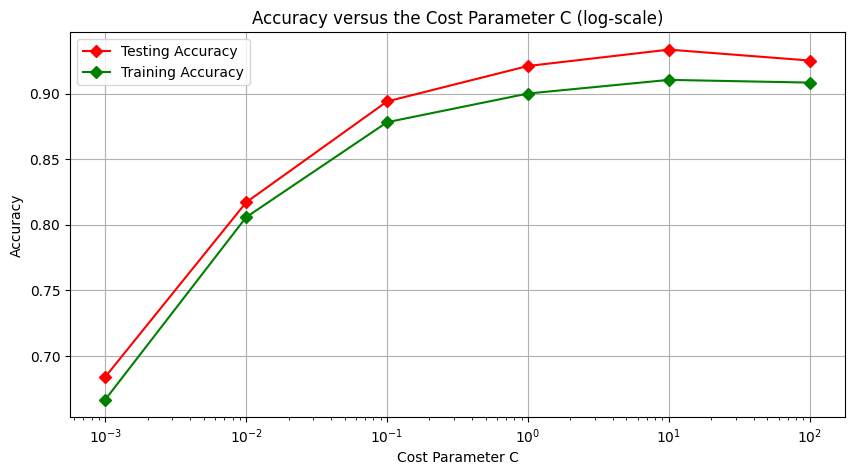

In [108]:
c = [0.001, 0.01, 0.1, 1, 10, 100]

plt.subplots(figsize=(10, 5))
plt.semilogx(c, acc, '-gD', color='red', label="Testing Accuracy")
plt.semilogx(c, acc_tr, '-gD', label="Training Accuracy")
plt.grid(True)
plt.xlabel("Cost Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus the Cost Parameter C (log-scale)')
plt.show()

#### Using GridSearchCV

In [109]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel': ['linear', 'poly', 'rbf']}  
  
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END C=0.001, gamma=scale, kernel=linear;, score=0.672 total time=   0.1s
[CV 2/5] END C=0.001, gamma=scale, kernel=linear;, score=0.628 total time=   0.1s
[CV 3/5] END C=0.001, gamma=scale, kernel=linear;, score=0.674 total time=   0.1s
[CV 4/5] END C=0.001, gamma=scale, kernel=linear;, score=0.654 total time=   0.1s
[CV 5/5] END C=0.001, gamma=scale, kernel=linear;, score=0.674 total time=   0.1s
[CV 1/5] END .C=0.001, gamma=scale, kernel=poly;, score=0.471 total time=   0.2s
[CV 2/5] END .C=0.001, gamma=scale, kernel=poly;, score=0.479 total time=   0.2s
[CV 3/5] END .C=0.001, gamma=scale, kernel=poly;, score=0.474 total time=   0.2s
[CV 4/5] END .C=0.001, gamma=scale, kernel=poly;, score=0.482 total time=   0.2s
[CV 5/5] END .C=0.001, gamma=scale, kernel=poly;, score=0.448 total time=   0.2s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.427 total time=   0.4s
[CV 2/5] END ..C=0.001, gamma=scale, kern

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10,
                                   100],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [110]:
# Print best parameter after tuning 
print("Best hyperparameters:", grid_svc.best_params_)

# Print how our model looks after hyper-parameter tuning 
print("Best estimator:", grid_svc.best_estimator_)

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator: SVC(C=10, gamma=0.1)


In [111]:
best_svc_model = SVC(C=10, gamma=0.1, kernel='rbf')
best_svc_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [112]:
# Make predictions
y_pred = best_svc_model.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy_svc}')
print()
print("------------------------------------------------------")
print()
print(f'Confusion Matrix:\n{conf_matrix}')
print()
print("------------------------------------------------------")
print()
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9875259875259875

------------------------------------------------------

Confusion Matrix:
[[ 75   1   2]
 [  0 194   2]
 [  0   1 206]]

------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.99      0.99      0.99       196
           2       0.98      1.00      0.99       207

    accuracy                           0.99       481
   macro avg       0.99      0.98      0.99       481
weighted avg       0.99      0.99      0.99       481



**Conclusions:**

The accuracy metric represents the overall correctness of the model's predictions. In this case, the model achieved an accuracy of approximately 98.75%, indicating that it made correct predictions for the majority of the instances in the dataset.

## Principal Components Analysis

### Choosing the best value for the number of components (n_components) using Cross-Validation

This task involves a balance between reducing dimensionality and retaining enough information for effective model training. So, we should experiment with different values and assess their impact on this specific modeling task.

In [113]:
from sklearn.decomposition import PCA

In [114]:
lr = LogisticRegression(random_state=42)

# Range of components to test
components_range = np.arange(10, 26)

mean_accuracies_pca = []

for n_components in components_range:
    # PCA-based feature selection
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    scores_pca = cross_val_score(lr, X_train_pca, y_train, cv=5)
    mean_accuracies_pca.append(np.mean(scores_pca))
    
    print(f"Components: {n_components}, PCA Accuracy: {np.mean(scores_pca)}")

Components: 10, PCA Accuracy: 0.7182291666666666
Components: 11, PCA Accuracy: 0.7708333333333333
Components: 12, PCA Accuracy: 0.771875
Components: 13, PCA Accuracy: 0.8130208333333334
Components: 14, PCA Accuracy: 0.825
Components: 15, PCA Accuracy: 0.8385416666666667
Components: 16, PCA Accuracy: 0.8401041666666667
Components: 17, PCA Accuracy: 0.8447916666666666
Components: 18, PCA Accuracy: 0.8520833333333332
Components: 19, PCA Accuracy: 0.8552083333333333
Components: 20, PCA Accuracy: 0.8619791666666666
Components: 21, PCA Accuracy: 0.8614583333333334
Components: 22, PCA Accuracy: 0.8677083333333334
Components: 23, PCA Accuracy: 0.865625
Components: 24, PCA Accuracy: 0.8682291666666666
Components: 25, PCA Accuracy: 0.8682291666666666


### Retraining the Models with Only 24 Components

In [115]:
pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### Logistic Regression

In [116]:
# Create a Logistic Regression model
lr_pca = LogisticRegression()

# Train the model on the PCA-transformed training data
lr_pca.fit(X_train_pca, y_train)

LogisticRegression()

In [117]:
accuracy_lr_pca = lr_pca.score(X_test_pca, y_test)
print(f"Original Accuracy: 0.918918918918919")
print(f"Accuracy with PCA: {accuracy_lr_pca}")

Original Accuracy: 0.918918918918919
Accuracy with PCA: 0.9002079002079002


#### Decision Trees and Random Forest

In [118]:
# Decision Tree
clf_best.fit(X_train_pca, y_train)

RandomForestClassifier(n_jobs=-1)

In [119]:
y_pred = clf_best.predict(X_test_pca)

# Evaluate the model
accuracy_dtc_pca = accuracy_score(y_test, y_pred)
print(f"Original Accuracy: {accuracy_dtc}")
print(f"Accuracy with PCA: {accuracy_dtc_pca}")

Original Accuracy: 0.9002079002079002
Accuracy with PCA: 0.9792099792099792


#### Support Vector Machines

In [120]:
best_svc_model.fit(X_train_pca, y_train)

SVC(C=10, gamma=0.1)

In [121]:
y_pred = clf_best.predict(X_test_pca)

# Evaluate the model
accuracy_svc_pca = accuracy_score(y_test, y_pred)
print(f"Original Accuracy: {accuracy_svc}")
print(f"Accuracy with PCA: {accuracy_svc_pca}")

Original Accuracy: 0.9875259875259875
Accuracy with PCA: 0.9792099792099792


### Comparing with Step 4 (Feature Selection)

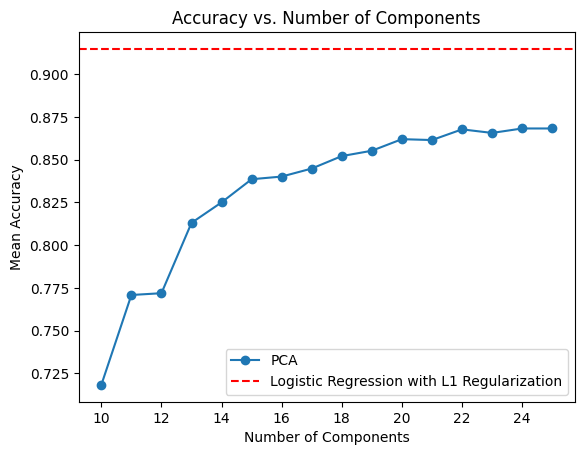

In [122]:
# Plot the results
plt.plot(components_range, mean_accuracies_pca, marker='o', label='PCA')
plt.axhline(y=accuracy_lrl1, color='r', linestyle='--', label='Logistic Regression with L1 Regularization')
plt.xlabel('Number of Components')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.legend()
plt.show()

According to the results, when we compare PCA and the best performing regularization technique (L1 Regularization) we can verify that the latter still gets the best accuracy out of the 2.